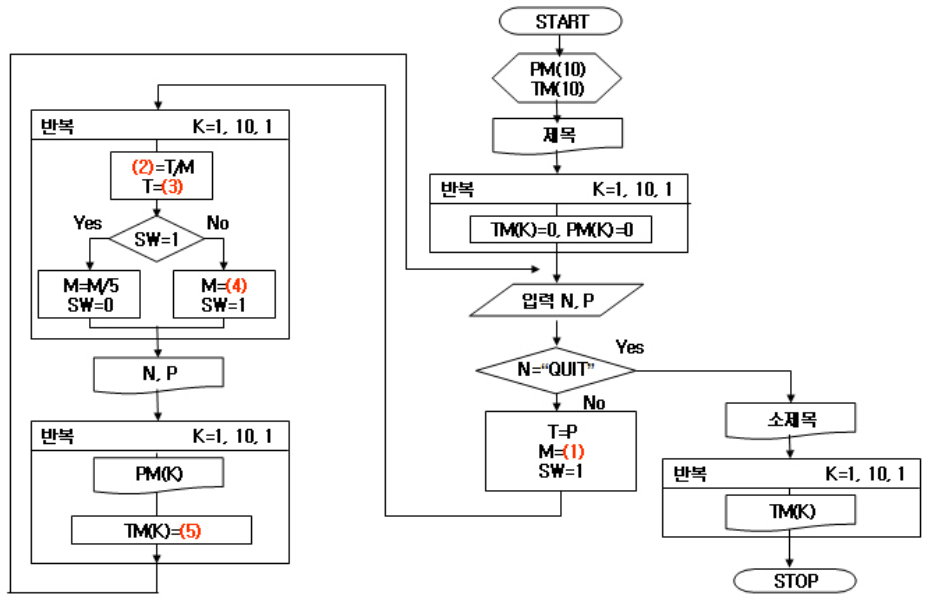

In [1]:
# 출장비로 지급할 화폐 매수 계산하기
from IPython.display import Image
Image('./money.png', width = '900')

In [8]:
pm = [0 for i in range(10)] # 개인별 화폐 매수가 기억될 리스트를 선언한다.
tm = [0 for i in range(10)] # 전체 화폐 매수가 기억될 리스트를 선언한다.

while True:
    n, p = input('이름과 출장비를 입력하세요 : ').split()
    if n.lower() == 'quit':
        break

    t = int(p) # 나중에 입력받은 출장비를 출력하기 위해서 출장비의 복사본을 만들어 작업한다.
    m = 50000  # 화폐 매수를 계산할 화폐 권종을 초기화 한다.
    sw = 1     # 화폐 권종을 변경에 사용하는 스위치(toggle) 변수
    
    # 화폐 권종의 개수 만큼 반복하며 개인별 화폐 매수를 계산한다.
    for k in range(10):
        pm[k] = t // m # 권종별 화폐 매수를 계산한다.
        t %= m         # 다음 화폐 권종의 매수를 계산하기 위해 권종별 화폐 매수를 계산하고 남은 나머지 금액을 계산한다.
        # 다음 화폐 권종을 계산한다.
        if sw == 1:
            m //= 5; sw = 0
        else:
            m //= 2; sw = 1
    # ===== for k 끝
    
    # 이름과 개인별 화폐 권종 수를 출력하고 전체 화폐 매수를 계산한다.
    print(n, end = '')
    for k in range(10):
        print(pm[k], end = ' ')
        tm[k] += pm[k]
    print()
 # ===== while True: 끝

print(tm)

이름과 출장비를 입력하세요 : 홍길동 111111
홍길동2 1 0 1 0 1 0 1 0 1 
이름과 출장비를 입력하세요 : 임꺽정 222222
임꺽정4 2 0 2 0 2 0 2 0 2 
이름과 출장비를 입력하세요 : quit 0
[6, 3, 0, 3, 0, 3, 0, 3, 0, 3]


In [26]:
# 개인별로 이름과 출장비를 기억하는 클래스
class Money:
    def __init__(self, name, money):
        self.name = name
        self.money = money
        # 개인별 화폐 매수를 계산한다.
        self.pm = [0 for i in range(10)]
        t = money
        m = 50000
        sw = 1
        for i in range(10):
            self.pm[i] = t // m
            t %= m
            if sw == 1:
                m //= 5; sw = 0
            else:
                m //= 2; sw = 1
        # ===== for i in range(10) 끝
    def __str__(self):
        return '{} {} {}'.format(self.name, self.money, self.pm)

In [27]:
money = Money('홍길동', 123456)
print(money.name)
print(money.money)
print(money.pm)
print(money)

홍길동
123456
[2, 2, 0, 3, 0, 4, 1, 0, 1, 1]
홍길동 123456 [2, 2, 0, 3, 0, 4, 1, 0, 1, 1]


In [29]:
m = []
while True:
    n, p = input('이름과 출장비를 입력하세요 : ').split()
    if n.lower() == 'quit':
        break
    
    money = Money(n, int(p))
    # print(money)
    m.append(money)

이름과 출장비를 입력하세요 : 홍길동 111111
이름과 출장비를 입력하세요 : 임꺽정 222222
이름과 출장비를 입력하세요 : 장길산 333333
이름과 출장비를 입력하세요 : quit 0


In [73]:
print('                                    출장비 지급 일람표')
print('=' * 86)
print('이름              출장비  50000 10000  5000  1000   500   100    50    10     5     1')
print('=' * 86)
tm = [0 for i in range(10)]
for i in m:
    print('{0:<10s} {1:10,d}'.format(i.name, i.money), end = ' ')
    for j in range(len(i.pm)):
        print('{0:6d}'.format(i.pm[j]), end = '')
        tm[j] += i.pm[j]
    print()
print('=' * 86)
print('                    합계 ', end = '')
for i in range(10):
    print('{0:6d}'.format(tm[i]), end = '')
print('\n' + '=' * 86)

                                    출장비 지급 일람표
이름              출장비  50000 10000  5000  1000   500   100    50    10     5     1
홍길동           111,111      2     1     0     1     0     1     0     1     0     1
임꺽정           222,222      4     2     0     2     0     2     0     2     0     2
장길산           333,333      6     3     0     3     0     3     0     3     0     3
                    합계     12     6     0     6     0     6     0     6     0     6
